# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Содержание проекта
[Шаг 1. Откройте файл с данными и изучите общую информацию.](#link1)

[Шаг 2. Предобработка данных.](#link2)

[Шаг 3. Посчитайте и добавьте в таболицу.](#link3)

[Шаг 4. Исследовательский анализ данных](#link4)
    
   [Построение гистограмм](#link41)
   
   [Изучение времени продажи квартир](#link42)
   
   [Удаление аномальных значений](#link43)
   
   [Факторы влияния на стоимость квартиры](#link44)
   
   [10 населенных пунктов с наибольшим числом объявлений](#link45)
   
   [Определение центральной области](#link46)
   
   [Сегмент квартир в центре](#link47)
   
[Шаг 5. Общий вывод](#link5)
   
   

### <a id="link1"> Шаг 1. Откройте файл с данными и изучите общую информацию. </a>

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

Прочитаем данные из csv файла в датафрейм и посмотрим общую информацию:

In [2]:
realEstate = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

print(realEstate.info())

display(realEstate.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Нами обнаружены пропусти в стобцах с количеством этажей, жилой площадью, высотой потолков, признаком апартаментов, числом балконов, жилой площадью и др. Так же некоторые столбцы, которые подразумевают под собой целочисленные заначения записаны под вещественным типом данных, например, столбец с последней ценой. Для других стобцов причиной несоответсвия типа данных являются пропуски в значениях, как в стобце с количеством этажей в здании. Пропуски могли возникнуть из-за того, что подавая объявление продавец зачастую не имеет на руках кадастрового или технического паспорта с планировкой квартиры, а соответсвенно не может досканально знать все площади помещений и высоту потолков.

Посмотрим подробнее распределение всех величин посредством метода describe:

In [3]:
display(realEstate.describe().T)

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


Отметим, что в столбце с ценой стандартное отклонение превышает среднее значение, это говорит нам о том, что имеет место большой разброс величины.

### Вывод

### <a id="link2"> Шаг 2. Предобработка данных </a>

Произведем предобработку данных: приведем стобцы с ценой, числом балконов, и количеством этажей к целочисленном типу для удобства их обработки в дальнейшем. Предварительно заменим пропущенные значения в столбце с количеством балконов на '0', т.к логично предположить, что если количество балконов для объекта недвижимости не указано, то они просто отсутствуют. Так же будем считать отсутствие данных признака апартаментов, сигналом о том, что объект не является аппаратаментами. Перед приведением к целочисленном типу удалим строки с пропусками (86) в столбце с количеством этажей в здании.
С целью дальнейшей обработки приведем к типу datetime столбец с датой и времени публикации объявления.

Заполнять пропущенные значения будем только в столбце с высотой потолков, т.к пропущенно внушительное их количество, а разброс величины крайне не высок, соответственно заполнение медианой не окажет существенного воздействия на характер распределения величины.

In [4]:
realEstate['last_price'] = realEstate['last_price'].astype('int64')

realEstate['balcony'] = realEstate['balcony'].fillna(0)

realEstate['balcony'] = realEstate['balcony'].astype('int64')

realEstate.dropna(subset=['floors_total'], inplace=True)

realEstate['floors_total'] = realEstate['floors_total'].astype('int64')

realEstate['is_apartment'] = realEstate['is_apartment'].fillna(False)

realEstate['first_day_exposition'] = pd.to_datetime(realEstate['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

realEstate['ceiling_height'] = realEstate['ceiling_height'].fillna(realEstate['ceiling_height'].median())

### <a id ="link3"> Шаг 3. Посчитайте и добавьте в таблицу </a>

Рассчитаем значения и добавим в таблицу следующие столбцы: price_per_meter - цена за квадратный метр, weekday - день недели, в который было опубликовано объявление, month - месяц публикации объявления, year - год публикации объявления, live_to_total - отношение жилой площади к общей площади, kitchen_to_total - отношение площади кухни к общей площади.

In [5]:
realEstate['price_per_meter'] = realEstate['last_price']/realEstate['total_area']

realEstate['weekday'] = realEstate['first_day_exposition'].dt.weekday

realEstate['month'] = realEstate['first_day_exposition'].dt.month

realEstate['year'] = realEstate['first_day_exposition'].dt.year

realEstate['live_to_total'] = realEstate['living_area']/realEstate['total_area']

realEstate['kitchen_to_total'] = realEstate['kitchen_area']/realEstate['total_area']


Посмотрим на обновленный датафрейм методом describe и убедимся в том, что добавленные величины не содержат аномальных значений:

In [6]:
realEstate.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23613.0,9.874518e+00,5.681541e+00,0.000000,6.000000e+00,9.000000e+00,1.400000e+01,5.000000e+01
last_price,23613.0,6.540555e+06,1.090172e+07,12190.000000,3.400000e+06,4.650000e+06,6.799000e+06,7.630000e+08
total_area,23613.0,6.034068e+01,3.564899e+01,12.000000,4.000000e+01,5.200000e+01,6.980000e+01,9.000000e+02
rooms,23613.0,2.071147e+00,1.078380e+00,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.900000e+01
ceiling_height,23613.0,2.724581e+00,9.900850e-01,1.000000,2.600000e+00,2.650000e+00,2.700000e+00,1.000000e+02
floors_total,23613.0,1.067382e+01,6.597173e+00,1.000000,5.000000e+00,9.000000e+00,1.600000e+01,6.000000e+01
living_area,21743.0,3.446278e+01,2.203743e+01,2.000000,1.860000e+01,3.000000e+01,4.230000e+01,4.097000e+02
floor,23613.0,5.877313e+00,4.873539e+00,1.000000,2.000000e+00,4.000000e+00,8.000000e+00,3.300000e+01
kitchen_area,21382.0,1.056413e+01,5.904316e+00,1.300000,7.000000e+00,9.100000e+00,1.200000e+01,1.120000e+02
balcony,23613.0,5.930631e-01,9.603071e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00


Определим функцию set_floor_group которая будет категоризировать значения этажа в объявлении с объектом недвижимости по следующим группам: первый, последний, другой. 

In [7]:
def set_floor_group(row):
    
    if row['floor'] == 1:
        
        return 'первый'
    
    elif row['floor'] == row['floors_total']:
        
        return 'последний'
    
    else:
        
        return 'другой'

Применим функцию к исходному датафрейму, запишем значения категорий в столбец floor_group, и посмотрим результат :

In [8]:
realEstate['floor_group'] = realEstate.apply(set_floor_group, axis=1)

realEstate['floor_group'].value_counts()

другой       17363
последний     3336
первый        2914
Name: floor_group, dtype: int64

Ожидаемо количество объектов недвижимости на "других" этажах численностью превышает группы объявлений c объектами на первом и последнем этаже в несколько раз.

### <a id="link4"> Шаг 4. Проведите исследовательский анализ данных и выполните инструкции: </a>

<a id="link41"> Построение гистограмм </a>

Определим функцию, которая будет выводить график распределения величины на интервале  и вызывать метод describe:

In [9]:
def column_describe_plot(column):
    
    quantile = column.quantile([0.25, 0.75])
    
    IQR = quantile[0.75] - quantile[0.25]
    
    if quantile[0.25]-1.5*IQR < column.min():
        
        lim_min = column.min()
        
    else:
        
        lim_min = quantile[0.25]-1.5*IQR
        
    if quantile[0.75]+1.5*IQR > column.max():
        
        lim_max = column.max()
        
    else:
        
        lim_max = quantile[0.75]+1.5*IQR
        
    column.hist(range = (lim_min, lim_max), bins = 100);
    
    plt.show()
    
    display(column.describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))
    

Поочередно вызовем функцию column_describe_plot для стобцов с общей площадью, ценой объекта, количеством комнат и высотой потолков:

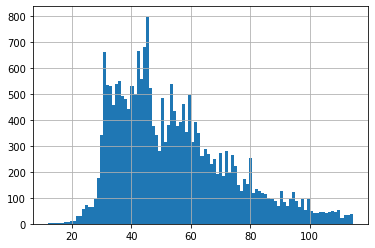

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
10%         33.000000
25%         40.000000
50%         52.000000
75%         69.800000
90%         93.400000
95%        116.000000
99%        197.176000
max        900.000000
Name: total_area, dtype: float64

In [10]:
column_describe_plot(realEstate['total_area'])

Основное распределение плодащи в объявлениях лежит в промежутке от 0 до 112 квадратных метров, среднее значения площади всех представленных квартир 60 кв.м. Шире всего на рынке представлены квартиры площадью от 30 до 50 кв.м. Люксовый сегмент недвижимости составляет около 1% от общей выборки.

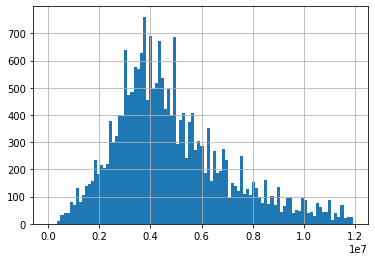

count    2.361300e+04
mean     6.540555e+06
std      1.090172e+07
min      1.219000e+04
10%      2.500000e+06
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
90%      1.090000e+07
95%      1.530000e+07
99%      3.600000e+07
max      7.630000e+08
Name: last_price, dtype: float64

In [11]:
column_describe_plot(realEstate['last_price'])

Основная масса представленных на рынке квартир продается в диапазоне от 2 до 6 млн. рублей. При этом среднее значение стоимости всех представленных квартир составлят 6.5 млн. рублей, стандартное отклонение превышает среднюю стоимость в полтора раза. На эту цифру оказывают серьезное влияние оказывают объявления из верхного ценового сегмента, стоимость которых в десятки раз превышает стоимость рядовой квартиры.

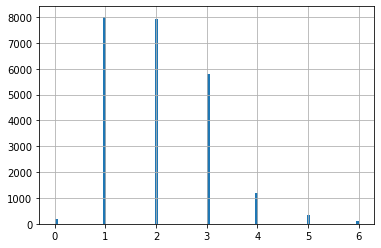

count    23613.000000
mean         2.071147
std          1.078380
min          0.000000
10%          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
90%          3.000000
95%          4.000000
99%          5.000000
max         19.000000
Name: rooms, dtype: float64

In [12]:
column_describe_plot(realEstate['rooms'])

Больше всего на рынке представлено однокомнатных и двухкомнатных квартир, их количество объявлений сопоставимо между собой и составляет около 8 тысяч. На 2 тысячи меньше было опубликовано объявлений с трехкомнтантыми квартирами. Остальным квартирам на рынке отводится всего 10% объявлений. 

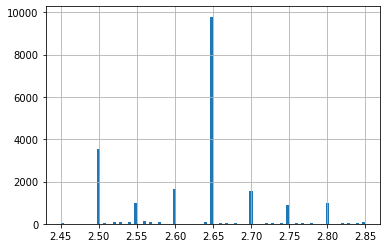

count    23613.000000
mean         2.724581
std          0.990085
min          1.000000
10%          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
90%          3.000000
95%          3.134000
99%          3.600000
max        100.000000
Name: ceiling_height, dtype: float64

In [13]:
column_describe_plot(realEstate['ceiling_height'])

Высота в 2 метра 65 сантиметров явлется модой и медиантой в распределении, это обусловлено тем, что именно этой величиной мы заполнили пропущенные значения. Так же в объявлениях часто довольно указывают высоту в размере 2 метров и 50 сантиметров. Все стандартные значения высоты потолков находятся в промежутке от 2.45 до 2.85 метров.

<a id="link42"> Изучение времени продажи квартир </a>

Выведем гистограмму распределения и описательную статистику для столбца со временем продажи: 

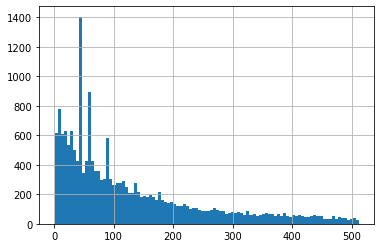

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
10%         17.000000
25%         45.000000
50%         95.000000
75%        232.000000
90%        460.000000
95%        647.000000
99%       1067.000000
max       1580.000000
Name: days_exposition, dtype: float64

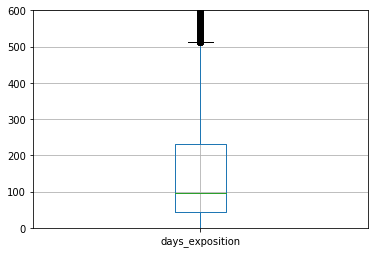

0    45.0
dtype: float64

In [14]:
column_describe_plot(realEstate['days_exposition'])

realEstate.boxplot('days_exposition');

plt.ylim(0, 600)

plt.show()

display(realEstate['days_exposition'].mode())

Судя по выведеным графикам, мы можем говорить о том, что обычно размещенные объявляения о продаже квартир находятся в публикации на сервисе Яндекс.Недвижимость от 1 до 513 дней. Чаще всего объявления снимаются с публикации через 45 дней, можно предположить, что по условиям сервиса объявление снимается с публикации, а от продавца требуется его повторная активация. 

Будем считать, что снятие объявление с публикации означает продажу объекта недвижимости или по крайней мере договор аванса, тогда 10% самых быстрых сделок закрываются в течении первых 17 дней с момента публикации. Если же объявление остается в публикации более 460 дней, то можно говорить о том, что объект недвижимости продается дольше, чем 90% остальных объектов на рынке, следовательно, стоит порекомендовать продавцу пересмотреть условия сделки.

<a id="link43"> Удаление аномальных значений </a>

Уберем аномальные значения из столбцов с ценой, количеством комнат, общей площадью и выстой потолков и посмотрим как изменилось распределение величин:

In [15]:
realEstate_clean = realEstate.query(
    '(0 < total_area < 197) and (1*10**6 < last_price < 3*10**7) and (0 < rooms <= 6) and ( 2.4 <= ceiling_height <= 4)')

display(realEstate_clean.describe().T)

realEstate.describe().T - realEstate_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,22650.0,9.863267e+00,5.655057e+00,0.000000e+00,6.000000e+00,9.000000e+00,1.400000e+01,5.000000e+01
last_price,22650.0,5.723771e+06,3.842963e+06,1.010000e+06,3.480000e+06,4.630000e+06,6.650000e+06,2.999900e+07
total_area,22650.0,5.771320e+01,2.491958e+01,1.200000e+01,4.000000e+01,5.200000e+01,6.830000e+01,1.960000e+02
rooms,22650.0,2.037925e+00,9.592432e-01,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
ceiling_height,22650.0,2.688491e+00,1.958408e-01,2.400000e+00,2.600000e+00,2.650000e+00,2.700000e+00,4.000000e+00
floors_total,22650.0,1.076684e+01,6.588541e+00,1.000000e+00,5.000000e+00,9.000000e+00,1.600000e+01,6.000000e+01
living_area,20891.0,3.297242e+01,1.662888e+01,2.000000e+00,1.860000e+01,3.000000e+01,4.200000e+01,1.647000e+02
floor,22650.0,5.910419e+00,4.886921e+00,1.000000e+00,2.000000e+00,4.000000e+00,8.000000e+00,3.300000e+01
kitchen_area,20717.0,1.027968e+01,5.008192e+00,1.300000e+00,7.000000e+00,9.000000e+00,1.180000e+01,6.500000e+01
balcony,22650.0,5.941722e-01,9.610644e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00


,count,mean,std,min,25%,50%,75%,max
total_images,963.0,0.011251,2.648403e-02,0.000000,0.000000,0.000000,0.000000,0.000000e+00
last_price,963.0,816784.003186,7.058760e+06,-997810.000000,-80000.000000,20000.000000,149000.000000,7.330010e+08
total_area,963.0,2.627474,1.072940e+01,0.000000,0.000000,0.000000,1.500000,7.040000e+02
rooms,963.0,0.033222,1.191367e-01,-1.000000,0.000000,0.000000,0.000000,1.300000e+01
ceiling_height,963.0,0.036090,7.942442e-01,-1.400000,0.000000,0.000000,0.000000,9.600000e+01
floors_total,963.0,-0.093020,8.631500e-03,0.000000,0.000000,0.000000,0.000000,0.000000e+00
living_area,852.0,1.490362,5.408554e+00,0.000000,0.000000,0.000000,0.300000,2.450000e+02
floor,963.0,-0.033106,-1.338180e-02,0.000000,0.000000,0.000000,0.000000,0.000000e+00
kitchen_area,665.0,0.284450,8.961245e-01,0.000000,0.000000,0.100000,0.200000,4.700000e+01
balcony,963.0,-0.001109,-7.573036e-04,0.000000,0.000000,0.000000,0.000000,0.000000e+00


В результате избавления от аномалий исходная выборка уменьшилась на 963 объявления, благодаря этому стандартное отклонение по цене уменьшилось на 65%, а среднее стало ближе к медиане. Это позволило стать распределению цены более однородным. Аналогичные изменения произошли и с другими распределниями величин: их стандартное отклонение уменьшилось, а среднее значение приблизилось к медиане.

<a id="link44"> Факторы влияния на стоимость квартиры </a>

,last_price,rooms,total_area,cityCenters_nearest
last_price,1.000000,0.486730,0.783318,-0.345118
rooms,0.486730,1.000000,0.788681,-0.153652
total_area,0.783318,0.788681,1.000000,-0.219276
cityCenters_nearest,-0.345118,-0.153652,-0.219276,1.000000


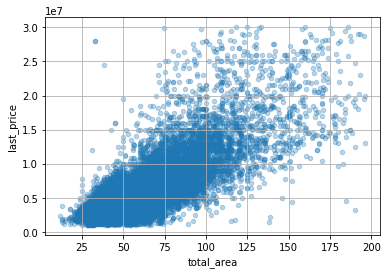

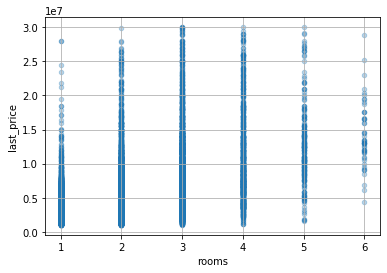

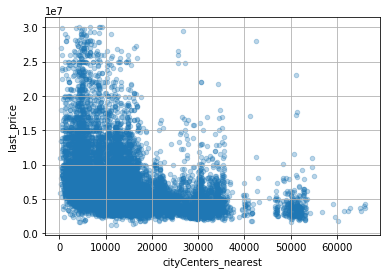

In [16]:
realEstate_price_corr = realEstate_clean[['last_price','rooms', 'total_area', 'cityCenters_nearest']]

display(realEstate_price_corr.corr())

columns_list = ['total_area', 'rooms', 'cityCenters_nearest']

for column in columns_list:
    
    realEstate_price_corr.plot(x = column , y = 'last_price', kind = 'scatter', grid = True, alpha = 0.3);
    
    plt.show()

На графиках хорошо видно, что существует некоторая линейная зависимость цены объекта недвижимости от его площади, причем с увеличеием площади объекта увеличивается разброс диапазона цен. Коэффициент корреляции между ценой и площадью квартиры составляет 0,78.

Коэффицент корреляции между ценой и количеством комнат составляет 0,48. Мы можем говорить о том, что с увеличением числа комнат в квартире увеличивается и ее цена. Думаю, данная связь является продолжением зависимости цены от общей площади, т.к с увеличением числа комнат, как правило, увеличивается и площадь квартиры, на что указывает коэффициент корреляции между этими параметрами в размере 0,79.

С расстоянием от центра цена связана обратнопропорционально, на это указывает коэффициент Пирсона -0,34. Стоимость квартир уменьшает по мере их удаленности от центра Санкт-Петербурга. На графике хорошо видно пустой промежуток, который указывает, что на расстоянии от 37 до 45 километров от центра отсутсвуют крупные населенные пункты и соответственно публикуется мало объявлений о продаже квартир.




Сгруппируем объявления по категориям этажа в здании, посмотрим описательную статистику распределения цены и построим гистограмму распределения:

,count,mean,std,min,25%,50%,75%,max
floor_group,,,,,,,,
другой,16745.0,5.946667e+06,3.873468e+06,1010000.0,3600000.0,4800000.0,6880000.0,29999000.0
первый,2778.0,4.600003e+06,2.904142e+06,1050000.0,2900000.0,3950000.0,5407500.0,26000000.0
последний,3127.0,5.528518e+06,4.209223e+06,1020000.0,3079000.0,4300000.0,6500000.0,29990000.0


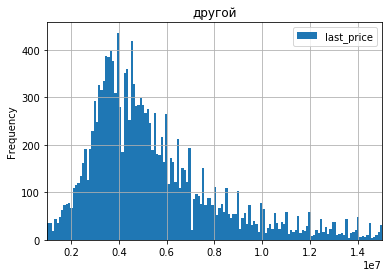

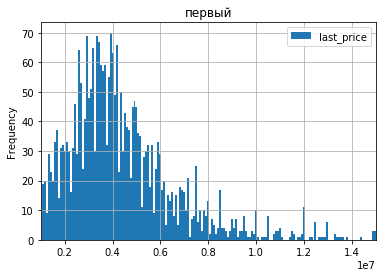

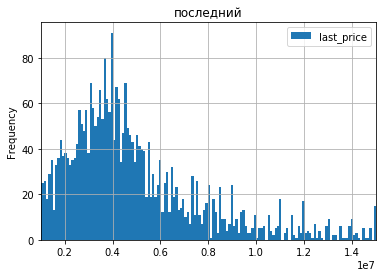

In [17]:
realstate_price_corr = realEstate_clean[['last_price','floor_group']]

display(realstate_price_corr.groupby('floor_group')['last_price'].describe())

for group_name, group_data in realstate_price_corr.groupby('floor_group'):
    
    group_data.plot(y = 'last_price', kind = 'hist', title = group_name, bins = 300, xlim = (10**6, 1.5*10**7), grid = True)
    
    

В среднем, самыми дорогими можно считать квартиры, расположенные не на первом и не на последнем этаже. Квартиры на последнем этаже имеют самый большой разброс в цене, это можно объяснить тем, что в старых домах последний этаж грозит покупателям проблемами с протечками, а в новостройках последний этаж ценится больше, т.к квартиры являются видовыми. Квартиры же на первом этаже являются самыми дешевыми по понятным причинам, таким как шум, холод и сырость. Таким образом, зависимость цены от этажа, на котором расположена квартиры, является нелинейной.

Построим графики зависимости цены квартиры от дня, месяца, и года публикации объявления:

,last_price,weekday,month,year
last_price,1.000000,-0.020964,0.004965,-0.030821
weekday,-0.020964,1.000000,0.011185,-0.002522
month,0.004965,0.011185,1.000000,-0.270541
year,-0.030821,-0.002522,-0.270541,1.000000


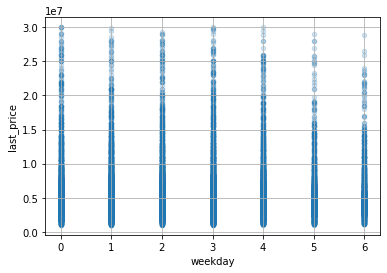

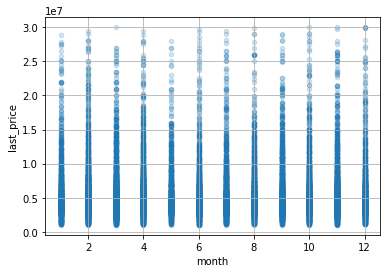

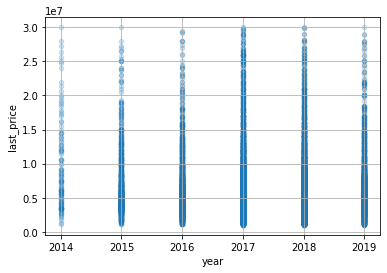

In [18]:
realEstate_price_corr = realEstate_clean[['last_price','weekday', 'month', 'year']]

display(realEstate_price_corr.corr())

columns_list = ['weekday', 'month', 'year']

for column in columns_list:
    
    realEstate_price_corr.plot(x = column , y = 'last_price', kind = 'scatter', grid = True, alpha = 0.2);
    
    plt.show()

На графике зависимости цены от дня недели публикации объявления хорошо видно, что цена не зависит от дня публикации. Что касается зависимости от месяца публикации, то можно отметить, что в зависимости присутсвует некоторая сезонность, в летние месяцы, а так же в декабре-январе наблюдается спад цен. Распределение же объявлений по годам указывает на то, что с 2014 по 2017 год наблюдался стабильный рост цен, однако после 2017 года пошел тренд на снижение.

<a id="link45"> 10 населенных пунктов с наибольшим числом объявлений </a>

Выведем список из 10 населенных пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра для каждого населенного пункта:

In [19]:
top10 = realEstate_clean['locality_name'].value_counts().head(10)

locality_top10 = realEstate_clean.query('locality_name in @top10.index')

Sorted_locality_top_10 = locality_top10.pivot_table(index = 'locality_name', values = 'price_per_meter').sort_values('price_per_meter', ascending = False)

display(Sorted_locality_top_10)


,price_per_meter
locality_name,
Санкт-Петербург,110476.389408
Пушкин,103054.142775
деревня Кудрово,92297.218847
посёлок Парголово,90448.423806
посёлок Мурино,85076.238902
посёлок Шушары,78277.935520
Колпино,75333.295801
Гатчина,68947.384358
Всеволожск,68700.152159


Ожидаемо самая высокая цена (110,5 тыс.руб/кв.м) квадратного метра оказалась в объявлениях по Санкт-Петербургу, а самая низкая (58,7 тыс.руб/кв.м) - в Выборге. В этом нет ничего удивительного, т.к Выборг наиболее удален от Санк-Петербурга относительно остальных населенных пунктов.

<a id="link46"> Определение центральной области </a>

Выделим объявления по Санкт-Петербургу, добавим для них колонку с расстоянием до центра в километрах, рассчитаем среднюю цену для каждого километра и построим график зависимости цены от расстояния до центра в километрах.

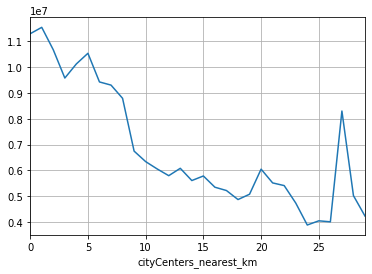

In [20]:
realEstate_SaintP = realEstate_clean.query('locality_name == "Санкт-Петербург" and ~cityCenters_nearest.isnull()').copy()

realEstate_SaintP.loc[: ,'cityCenters_nearest_km'] = round((realEstate_SaintP['cityCenters_nearest']/1000), 0)

realEstate_SaintP_km_price = realEstate_SaintP.groupby('cityCenters_nearest_km')['last_price'].mean()

realEstate_SaintP_km_price.plot(kind = 'line', use_index = True, grid = True);

Судя по графику, можно сделать вывод о том, что центром можно считать область в радиусе 5 километров. Изучим подробнее объявления попадающией в данную область.

<a id="link47"> Сегмент квартир в центре </a>

Сделаем срез по объявлениям квартир в центре Санкт-Петербурга, построим гистограммы распределения цены, общей площади, высоты потолков и количества комнат для этого среза. Сравним эти распределения распределениями величин в целом по городу.

In [21]:
realEstate_SaintP_center = realEstate_SaintP.query('cityCenters_nearest_km <= 5')

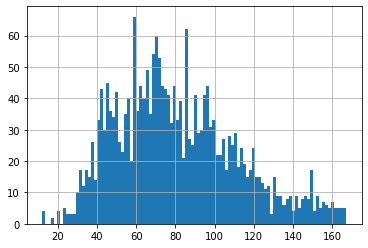

count    2221.000000
mean       83.114097
std        33.828851
min        12.000000
10%        44.000000
25%        59.000000
50%        77.600000
75%       102.300000
90%       130.000000
95%       150.000000
99%       178.080000
max       195.700000
Name: total_area, dtype: float64

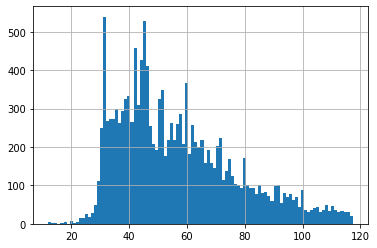

count    15011.000000
mean        60.606445
std         26.903390
min         12.000000
10%         34.000000
25%         41.800000
50%         54.000000
75%         72.000000
90%         96.000000
95%        114.000000
99%        156.000000
max        196.000000
Name: total_area, dtype: float64

In [22]:
column_describe_plot(realEstate_SaintP_center['total_area'])

column_describe_plot(realEstate_SaintP['total_area'])

Можно сделать вывод о том, что квартиры выставленные на продажу в центральной зоне в среднем на 31% превосходят метражом квартиры из объявлений по городу в целом.

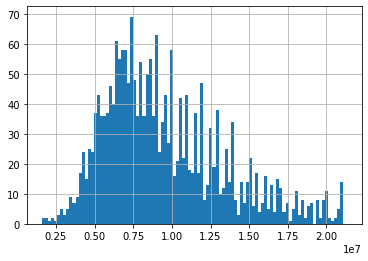

count    2.221000e+03
mean     1.037186e+07
std      5.214925e+06
min      1.600000e+06
10%      5.300000e+06
25%      6.799000e+06
50%      8.925000e+06
75%      1.259690e+07
90%      1.741472e+07
95%      2.184000e+07
99%      2.750000e+07
max      2.999900e+07
Name: last_price, dtype: float64

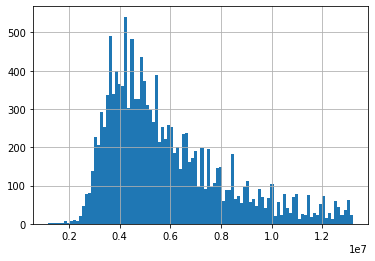

count    1.501100e+04
mean     6.777247e+06
std      4.086916e+06
min      1.190000e+06
10%      3.500000e+06
25%      4.200000e+06
50%      5.450000e+06
75%      7.800000e+06
90%      1.190000e+07
95%      1.500000e+07
99%      2.398100e+07
max      2.999900e+07
Name: last_price, dtype: float64

In [23]:
column_describe_plot(realEstate_SaintP_center['last_price'])

column_describe_plot(realEstate_SaintP['last_price'])

И так как между площадью и ценой есть линейная зависимость, то в центре мы наблюдаем соответсвующие 34% увеличения стоимости.

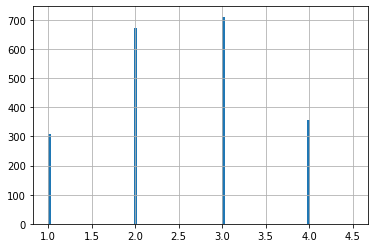

count    2221.000000
mean        2.751914
std         1.163697
min         1.000000
10%         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
90%         4.000000
95%         5.000000
99%         6.000000
max         6.000000
Name: rooms, dtype: float64

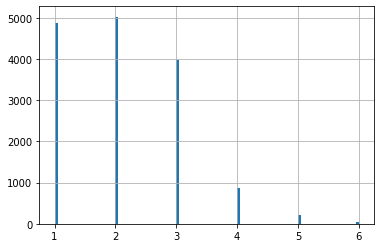

count    15011.000000
mean         2.111119
std          0.993270
min          1.000000
10%          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
90%          3.000000
95%          4.000000
99%          5.000000
max          6.000000
Name: rooms, dtype: float64

In [24]:
column_describe_plot(realEstate_SaintP_center['rooms'])

column_describe_plot(realEstate_SaintP['rooms'])

В отличии от всего города, где чаще всего к покупке предлагаются однокомнатные и двухкомнатные квартиры, в центральной зоне чаще всего покупателю предлагают трехкомнатные квартиры.

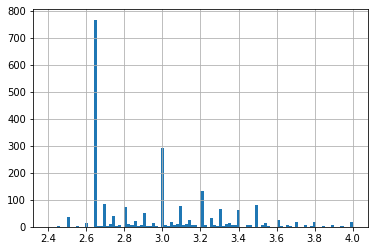

count    2221.000000
mean        2.951981
std         0.335369
min         2.400000
10%         2.650000
25%         2.650000
50%         2.900000
75%         3.200000
90%         3.460000
95%         3.600000
99%         3.924000
max         4.000000
Name: ceiling_height, dtype: float64

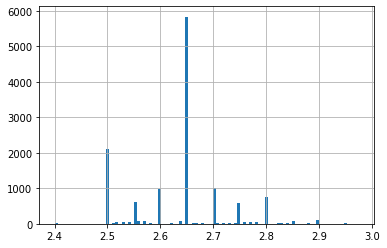

count    15011.000000
mean         2.710133
std          0.217087
min          2.400000
10%          2.500000
25%          2.600000
50%          2.650000
75%          2.750000
90%          3.000000
95%          3.200000
99%          3.550000
max          4.000000
Name: ceiling_height, dtype: float64

In [25]:
column_describe_plot(realEstate_SaintP_center['ceiling_height'])

column_describe_plot(realEstate_SaintP['ceiling_height'])

Средняя высота потолков в объявлениях из центра на 20 см превышает высоту потолков по городу в целом.

Построим графики зависимостей цены от количества комнтат, близости центра, дня недели, месяца и года публикации. Сравним результаты по объявлениям в центре и по городу в целом.

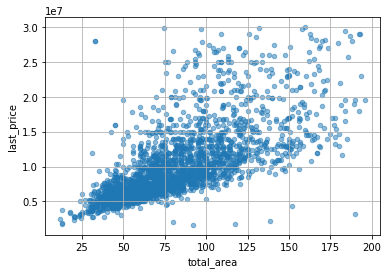

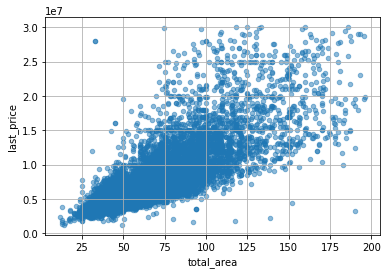

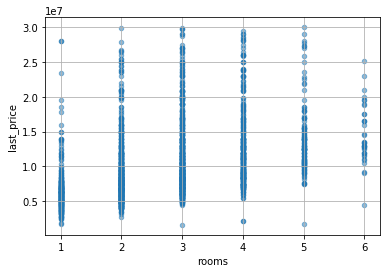

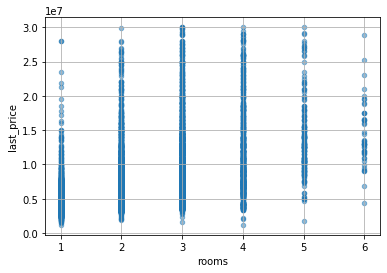

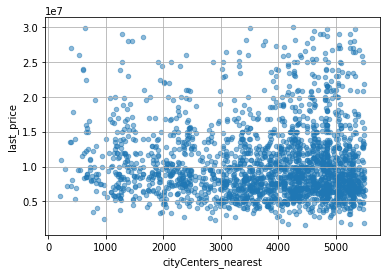

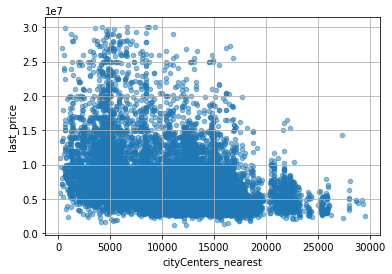

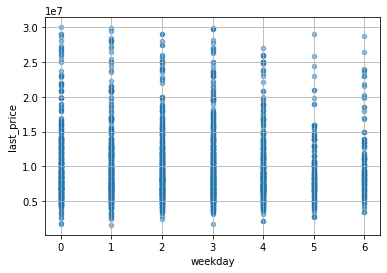

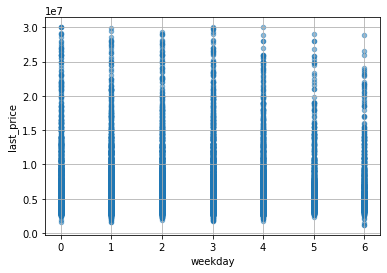

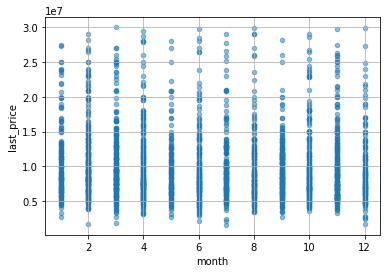

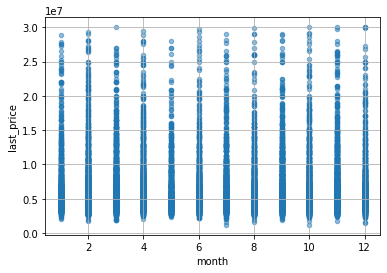

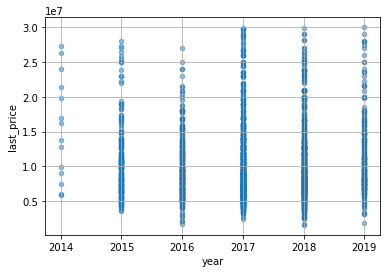

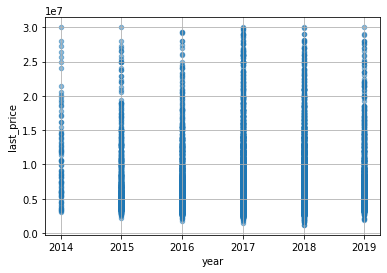

In [26]:
columns_list = ['total_area', 'rooms', 'cityCenters_nearest', 'weekday', 'month', 'year']

for column in columns_list:
    
    realEstate_SaintP_center.plot(x = column , y = 'last_price', kind = 'scatter', grid = True, alpha = 0.5);
    
    plt.show()
    
    realEstate_SaintP.plot(x = column , y = 'last_price', kind = 'scatter', grid = True, alpha = 0.5);
    
    plt.show()

Проанализировав графики, можно сделать вывод о том, что объявления из центральной зоны подчиняются тем же зависимостям, что и обявления по городу в целом.

### <a id="link5">Шаг 5. Общий вывод</a>

Для исходных объявлений были добавлены значения цены на квадратный метр; дня, месяца и года публикации объявления; соотношения жилой площади и площади кухни к общей площади квартиры; а так же категории этажей.
<br> В части исследования были установлены основные факторы, влияющие на формирование стоимости объекта, ими оказались: площадь квартиры, количество комнат, этаж, удаленность от центра, месяц и год публикации объявления. </br> 
<br>Для десяти населенных пунктов с наибольшим количеством объявлений определена средняя стоимость квадратного метра. Самой высокой она оказалась в Санкте-Петербурге, самой низкой - в Выборге. </br>
<br> Графическим методом найдена область Санкт-Петербурга, которая может быть отнесена к центру, область с радиусом в 5 км. Для объявлений внутри Санкт-Петербурга и отельно его центра построенные гистограммы распределения для стоимости, общей площади, количества комнат и высоты потолков. Найдены различия между типовыми объявлениями в центре и в городе в целом. 
Для обеих групп объявлений подтверждены ранее обнаруженные зависимости стоимости от ряда факторов. </br>


